In [1]:
from __future__ import division
import sys,os
import time, datetime
import argparse

import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import cm

import pandas as pd
from   glob import glob

# %matplotlib notebook

## Import MKID libraries

In [2]:
## Load the modules
sys.path.insert(1, "/home/nexus-admin/NEXUS_RF/BackendTools")

import ResonanceFitter as fitres
import ResonanceFitResult as fitclass

import VNAMeas

import PyMKID_USRP_functions as puf
import MB_equations as MBe

## Runtime options

In [3]:
## Flag to display plots
show_plots = False

## Which powers to look at
pwr_min = -55
pwr_max = -15
pwr_stp =   5

## What's the temperature range
T_min =  10 
T_max = 350

## Define the set of powers we're interested in
power_range = np.arange(start=pwr_min, stop=pwr_max+pwr_stp, step=pwr_stp)
n_powers    = len(power_range)

## Set up global plot options

In [4]:
## Set up matplotlib options for plots
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
dfc = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Temperature color scale
norm_T = plt.Normalize(vmin=T_min,vmax=T_max)
norm_P = plt.Normalize(vmin=pwr_min,vmax=pwr_max)

## Paths & file handling

In [5]:
## Series identifiers
# day = '20220419'

day_min  = '20220725'
time_min = '111503'

day_max  = '20220725'
time_max = '175630'

# day_min  = '20220725'
# time_min = '180911'

# day_max  = '20220726'
# time_max = '062506'

## Path to VNA data
dataPath = '/data/TempSweeps/VNA/'

## Create a place to store processed output
# out_path = '/data/ProcessedOutputs/out_' + series

## Method to pull all files for a given RF power

In [6]:
def get_input_files_all(day, pwr, verbose=False):

    ## Get all folders in date
    datePath    = os.path.join(dataPath, day)

    ## Define the series path from the series
    srPath = os.path.join(datePath, "*_*")

    ## File string format
    fn_form = ("TPsweep_T*_P%i" % pwr) + "_*.h5"

    ## Find and sort the relevant directories in the series
    if (verbose):
        print("Searching for files in:", srPath)
        print(" with form:", fn_form)
    vna_file_list = glob(os.path.join(srPath,fn_form))
    vna_file_list.sort(key=os.path.getmtime)
    if (verbose):
        print("Using files:")
        for fname in vna_file_list:
            print("-",fname)
    return np.array(vna_file_list)

In [7]:
def dt_from_fname(fname):
    ## Remove the extension
    fname = fname.split("/")[-1].split(".")[-2]
    
    ## Grab the date and time strings
    dtstr = fname.split("_")[-2:]
    
    ## Parse those strings into a datetime object
    ts    = datetime.datetime( int(dtstr[0][0:4]) , int(dtstr[0][4:6]) , int(dtstr[0][6:8]) ,
                               int(dtstr[1][0:2]) , int(dtstr[1][2:4]) , int(dtstr[1][4:6]) )
    return ts

In [8]:
def get_input_files_range(day_min, time_min, day_max, time_max, pwr, verbose=False):
    
    ts_min = datetime.datetime( int(str( day_min)[0:4]) , int(str( day_min)[4:6]) , int(str( day_min)[6:8]) ,
                                int(str(time_min)[0:2]) , int(str(time_min)[2:4]) , int(str(time_min)[4:6]) )
    
    ts_max = datetime.datetime( int(str( day_max)[0:4]) , int(str( day_max)[4:6]) , int(str( day_max)[6:8]) ,
                                int(str(time_max)[0:2]) , int(str(time_max)[2:4]) , int(str(time_max)[4:6]) )
    
    all_fs = get_input_files_all(day_min, pwr, verbose)
    
    all_dt = np.vectorize(dt_from_fname)(all_fs)
    
    indexr = (all_dt >= ts_min) * (all_dt <= ts_max)
    
    return all_fs[indexr]

## Outer Loop
Loop over each RF stimulus power, get the S21 vs F data for each T, fit to MB equations, store fit data. Need to separate out Al vs Nb 7 resonators.

In [9]:
resonator = "Al" ## "Al" or Nb7"
idx  = 0 if resonator=="Al" else 1
resf = 4.242182 if resonator=="Al" else 4.244763
power_to_plot = -40

## Resonance plot

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #1


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0
Resonance #1
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #1
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #1
Resonance #2


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #1
Resonance #2
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #1


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #1


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #1
Resonance #2
Resonance #3
Resonance #4
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #1
Resonance #2
Resonance #3
Resonance #4
Resonance #5
Resonance #6
Resonance #7
Resonance #8
Resonance #9


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #1
Resonance #2
Resonance #3
Resonance #4
Resonance #5
Resonance #6
Resonance #7


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0
Resonance #1
Resonance #2
Resonance #3
Resonance #4
Resonance #5
Resonance #6
Resonance #7


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #1
Resonance #2
Resonance #3
Resonance #4
Resonance #5


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0


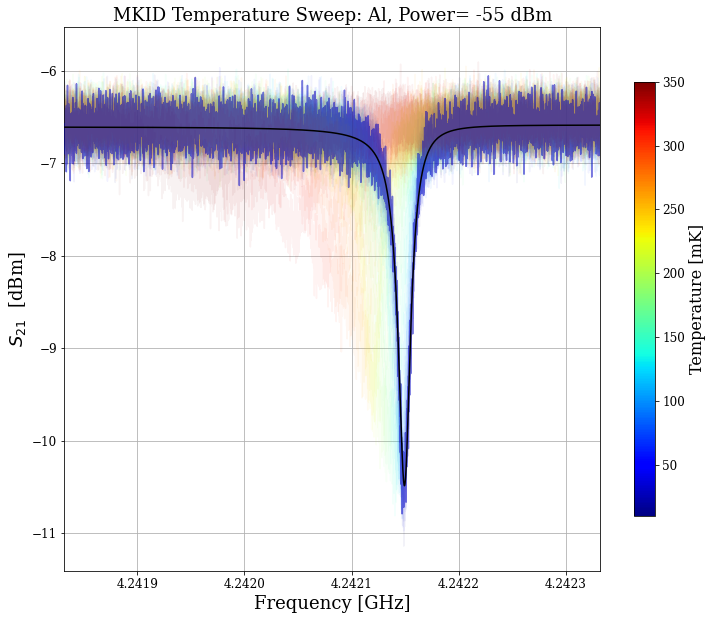

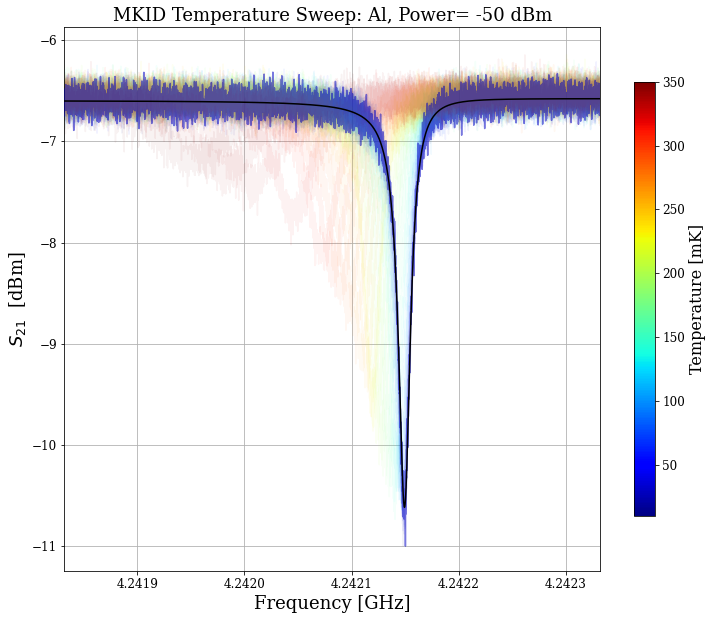

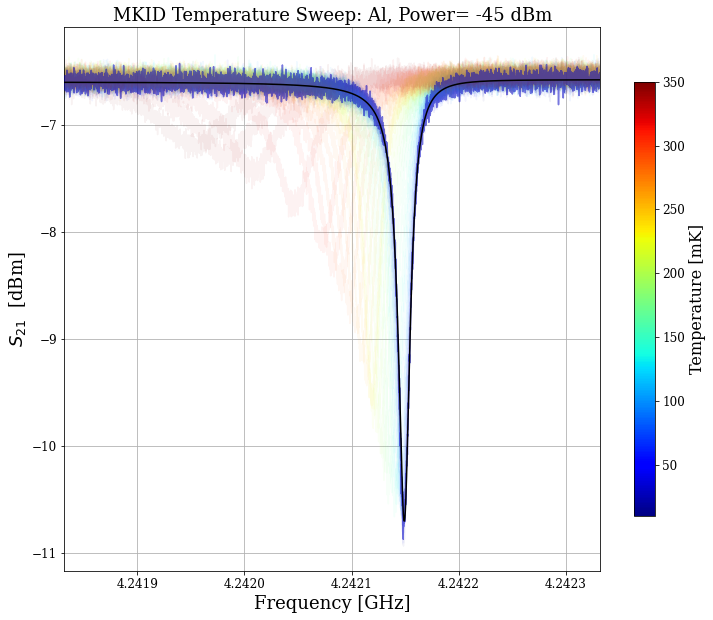

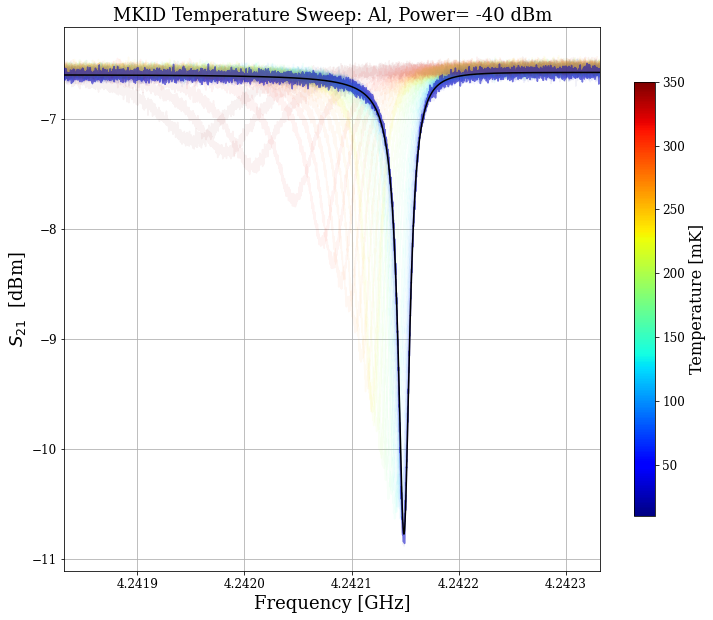

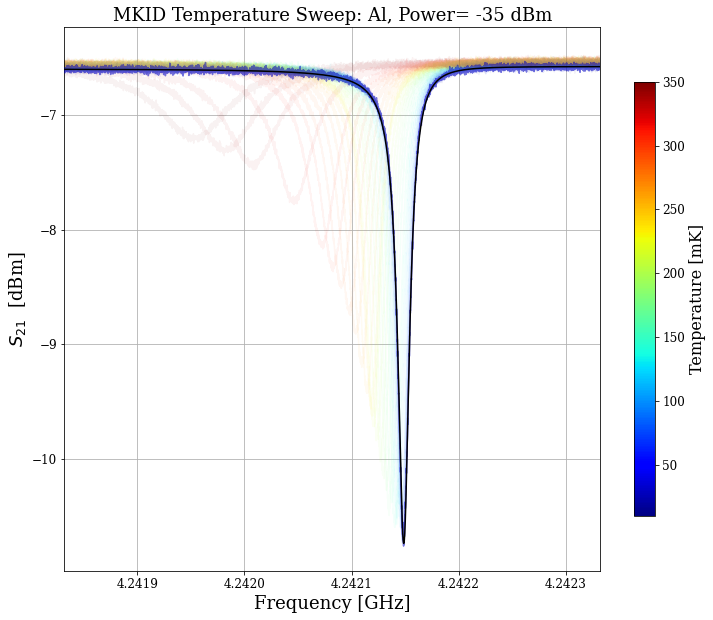

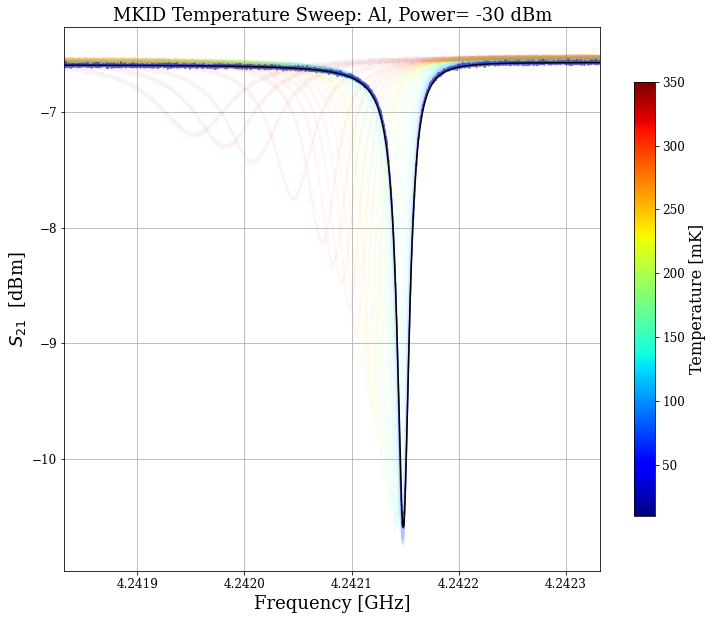

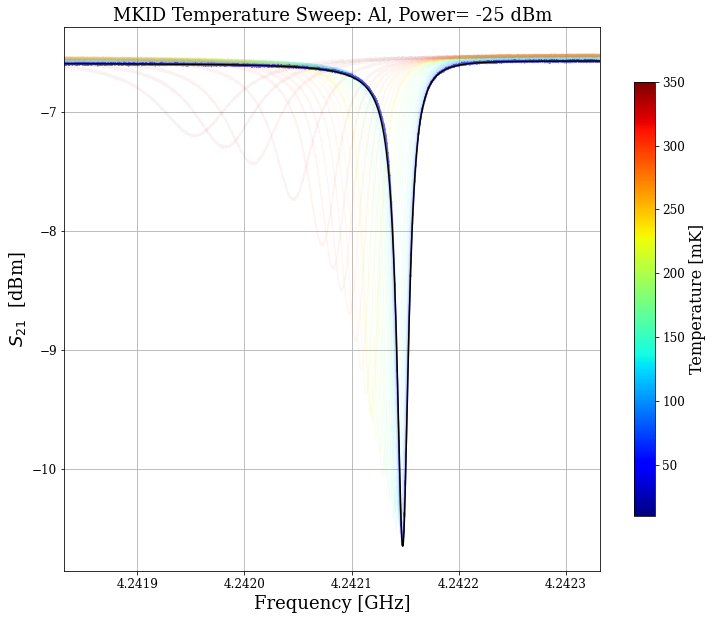

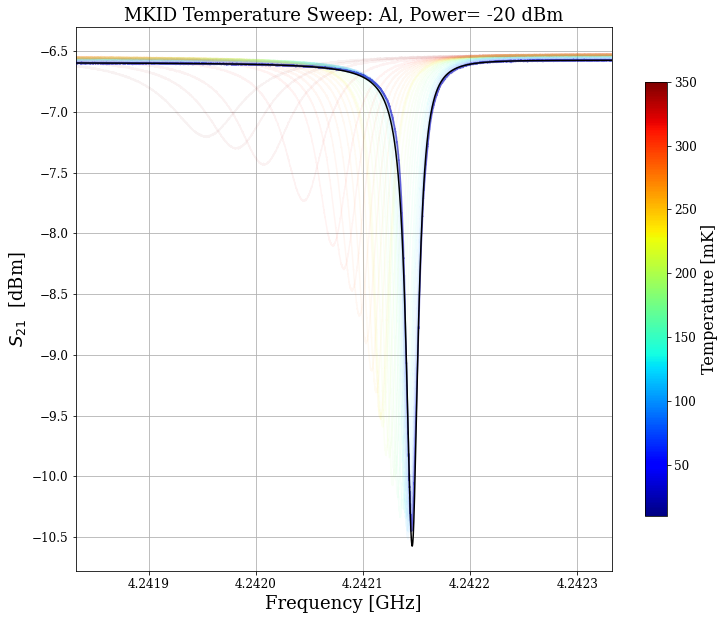

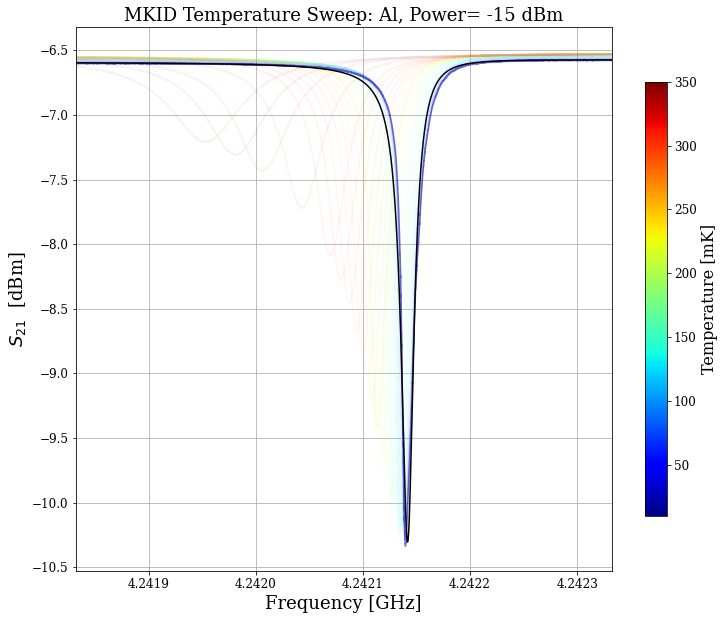

In [10]:
## Create a figure for the spectra at a given power
fig_list = np.zeros(n_powers, dtype='object')

## Output containers
result_by_power_fr = np.empty(n_powers, dtype=object)
result_by_power_Qr = np.empty(n_powers, dtype=object)
result_by_power_Qc = np.empty(n_powers, dtype=object)
result_by_power_Qi = np.empty(n_powers, dtype=object)
colors_by_power    = np.empty(n_powers, dtype=object)

## Start the loop over each power
for i in np.arange(n_powers):
    pwr = power_range[i]
    
    ## Create a plot for this power
    fig_list[i] = plt.figure(1300+i,figsize=(12,10))
    ax_res  = fig_list[i].gca()
    ax_res.set_title('MKID Temperature Sweep: '+resonator+", Power= "+str(pwr)+" dBm", fontdict = {'fontsize': 18})
    ax_res.set_xlabel(r'Frequency [GHz]', fontdict = {'fontsize': 18})
    ax_res.set_ylabel(r'$S_{21}$  [dBm]', fontdict = {'fontsize': 18})

    cbar=plt.colorbar(cm.ScalarMappable(cmap=cm.jet, norm=norm_T),shrink=0.8)
    cbar.set_label('Temperature [mK]', size=16)
    # plt.legend(loc='best')#,bbox_to_anchor=(1.,0.5))
    
    ## Get the color for this power
    colors_by_power[i] = cm.jet(norm_P(float(pwr)))
    
    ## Get the list of files at this power
#     print("Power = ",pwr," dBM files:")
#     p_files = get_input_files_all(day, pwr, verbose=True)[idx::2]
    p_files = get_input_files_range(day_min, time_min, day_max, time_max, pwr, verbose=False)[idx::2]
    
    ## Extract the temperature setpoints from the file naming scheme
    temp_range = np.array([ float(f.split("/")[-1].split("_")[1][1:]) for f in p_files ])
    n_temps    = len(temp_range)
    
    ## Create container for this power
    result_fr = np.zeros( shape=(n_temps,2) )
    result_Qr = np.zeros( shape=(n_temps,2) )
    result_Qc = np.zeros( shape=(n_temps,2) )
    result_Qi = np.zeros( shape=(n_temps,2) )
    result_fr[:,0] = temp_range
    result_Qr[:,0] = temp_range
    result_Qc[:,0] = temp_range
    result_Qi[:,0] = temp_range
    
    ## Create an object to write to an h5 file with fit results
#     sfr = fitclass.SeriesFitResult(day, day+"_999999P"+str(int(pwr)))
#     sfr.resize_file_fits(n_temps)
    
    ## Now loop over each temperature
    for j in np.arange(n_temps):
        
        ## Load the VNA data for this power, temperature pair
        sweep = VNAMeas.decode_hdf5(p_files[j]) ## VNAMeas.decode_hdf5()
        
        ## Parse the file, get a complex S21 and frequency in GHz
        f = sweep.frequencies / 1.0e9
        z = sweep.S21realvals + 1j*sweep.S21imagvals
        
        this_f_r = fitclass.SingleFileResult(p_files[j])
        this_f_r.power = pwr
        this_f_r.start_T = temp_range[j] * np.ones(2)
        this_f_r.final_T = temp_range[j] * np.ones(2)
        
        ## Fit this data file
        fr, Qr, Qc, Qi, fig = fitres.sweep_fit(f,z,this_f_r,start_f=f[0],stop_f=f[-1],verbose=False,show_plots=False)
        
        ## Save to file
#         sfr.file_fits[j] = this_f_r

        if (len(fr) > 1):
            fr = fr[0]
            Qr = Qr[0]
            Qc = Qc[0]
            Qi = Qi[0]
            
        result_fr[j,1] = fr
        result_Qr[j,1] = Qr
        result_Qc[j,1] = Qc
        result_Qi[j,1] = Qi
        
        ## Extract fit results
        Qchatmag = this_f_r.peak_fits[0].fine_result["QcHat"]
        a_real   = this_f_r.peak_fits[0].fine_result["zOff"].real
        a_img    = this_f_r.peak_fits[0].fine_result["zOff"].imag
        phi      = this_f_r.peak_fits[0].fine_result["phi"]
        tau      = this_f_r.peak_fits[0].fine_result["tau"].real
        imtau    = this_f_r.peak_fits[0].fine_result["tau"].imag
        
#         p0 -> fr
#         p1 -> Qr
#         p2 -> Qc
#         p3 -> a_real+1j*a_img
#         p4 -> phi
#         p5 -> tau+1j*imtau
#         p6 -> Qchatmag

        ## Calculate the resonance fits
        fit_z_uncorr = fitres.resfunc3(f, fr, Qr, Qchatmag, a_real+1j*a_img, phi, tau+1j*imtau)
        fit_z_corr   = 1-(Qr/Qc)/(1+2j*Qr*(f-fr)/fr)
#         z_array_corr = 1-((1-z_array/((a_real+1j*a_img)*np.exp(-2j*np.pi*(f-fr)*(tau+1j*imtau))))*(np.cos(phi)/np.exp(1j*phi)))

#         if (pwr==power_to_plot):
        ax_res.plot(f, 20.*np.log10(np.sqrt(z*z)),label=str(temp_range[j]),alpha=0.05,color=cm.jet(norm_T(temp_range[j])))
#             ax_res.plot(f, -12.5-10.*fitres.resfunc8(f, fr, Qr, Qchatmag, a_real, a_img, phi, tau, imtau), "k-")
        if (j==2):
            ax_res.plot(f, 20.*np.log10(np.sqrt(z*z)),label=str(temp_range[j]),alpha=0.5,color=cm.jet(norm_T(temp_range[j])),zorder=100)
            ax_res.plot(f, 20*np.log10(fit_z_uncorr), "k-",zorder=101)
        
#     sfr.save_to_file("/data/ProcessedOutputs/out_"+day)

    result_by_power_fr[i] = result_fr
    result_by_power_Qr[i] = result_Qr
    result_by_power_Qi[i] = result_Qi
    result_by_power_Qc[i] = result_Qc

    fig_list[i].gca().set_xlim([resf-0.00035,resf+0.00015])
    fig_list[i].savefig("/home/nexus-admin/Downloads/temp_"+str(pwr)+".png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

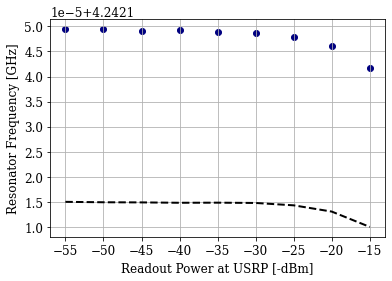

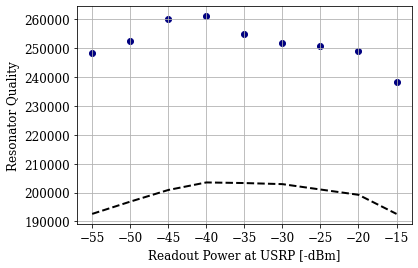

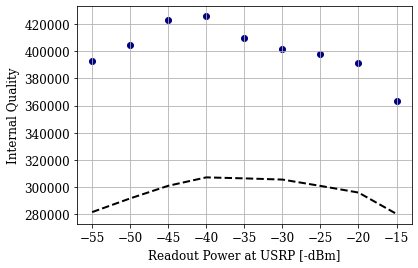

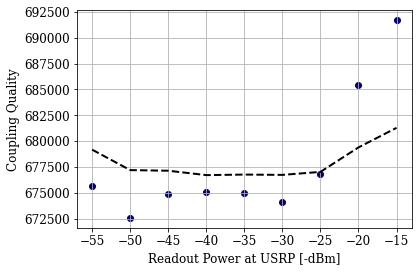

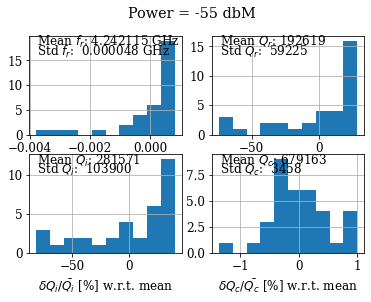

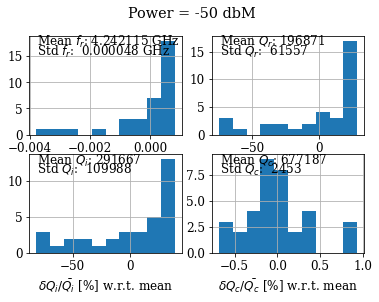

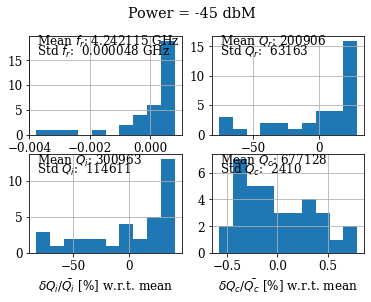

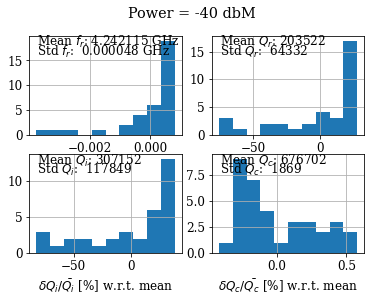

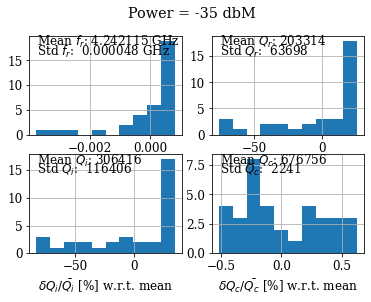

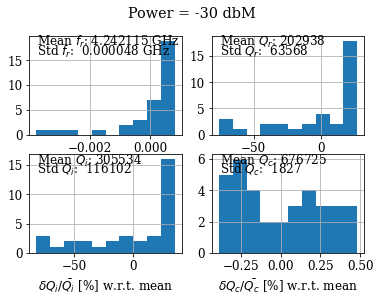

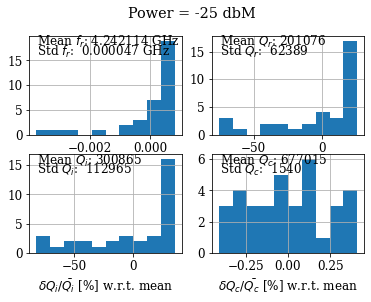

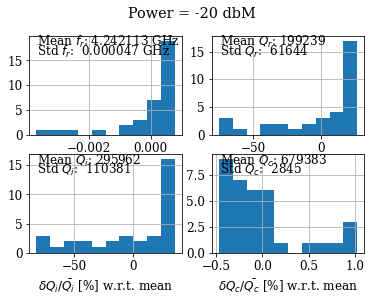

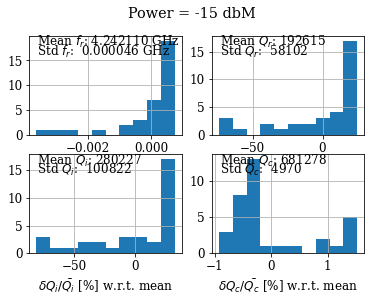

In [40]:
show_every_temp = False
show_base_temp  = True

Fr_mean_by_power = np.zeros(n_powers)
Qr_mean_by_power = np.zeros(n_powers)
Qi_mean_by_power = np.zeros(n_powers)
Qc_mean_by_power = np.zeros(n_powers)

fig = plt.figure()
ax0 = fig.gca()
ax0.set_xlabel("Readout Power at USRP [-dBm]")
ax0.set_ylabel("Resonator Frequency [GHz]")

fig = plt.figure()
ax1 = fig.gca()
ax1.set_xlabel("Readout Power at USRP [-dBm]")
ax1.set_ylabel("Resonator Quality")

fig = plt.figure()
ax2 = fig.gca()
ax2.set_xlabel("Readout Power at USRP [-dBm]")
ax2.set_ylabel("Internal Quality")

fig = plt.figure()
ax3 = fig.gca()
ax3.set_xlabel("Readout Power at USRP [-dBm]")
ax3.set_ylabel("Coupling Quality")

for i in np.arange(n_powers):
    
    pwr = power_range[i]
    
    Fr_per_T = result_by_power_fr[i][:,1]
    Qr_per_T = result_by_power_Qr[i][:,1]
    Qi_per_T = result_by_power_Qi[i][:,1]
    Qc_per_T = result_by_power_Qc[i][:,1]
    
    fr_T_mean = np.mean(Fr_per_T)
    Fr_mean_by_power[i] = fr_T_mean
    fr_T_std  = np.std(Fr_per_T)
    fr_T_delt = ( Fr_per_T - fr_T_mean ) / fr_T_mean
    
    Qr_T_mean = np.mean(Qr_per_T)
    Qr_mean_by_power[i] = Qr_T_mean
    Qr_T_std  = np.std(Qr_per_T)
    Qr_T_delt = ( Qr_per_T - Qr_T_mean ) / Qr_T_mean

    Qi_T_mean = np.mean(Qi_per_T)
    Qi_mean_by_power[i] = Qi_T_mean
    Qi_T_std  = np.std(Qi_per_T)
    Qi_T_delt = ( Qi_per_T - Qi_T_mean ) / Qi_T_mean
    
    Qc_T_mean = np.mean(Qc_per_T)
    Qc_mean_by_power[i] = Qc_T_mean
    Qc_T_std  = np.std(Qc_per_T)
    Qc_T_delt = ( Qc_per_T - Qc_T_mean ) / Qc_T_mean
    
    if show_every_temp:
        ax0.scatter(pwr*np.ones(len(Fr_per_T)), Fr_per_T, c=cm.jet(norm_T(result_by_power_fr[i][:,0])))
        ax1.scatter(pwr*np.ones(len(Qr_per_T)), Qr_per_T, c=cm.jet(norm_T(result_by_power_fr[i][:,0])))
        ax2.scatter(pwr*np.ones(len(Qi_per_T)), Qi_per_T, c=cm.jet(norm_T(result_by_power_fr[i][:,0])))
        ax3.scatter(pwr*np.ones(len(Qc_per_T)), Qc_per_T, c=cm.jet(norm_T(result_by_power_fr[i][:,0])))
    else if show_base_temp:
        ax0.scatter(pwr, Fr_per_T[0], c=cm.jet(norm_T(result_by_power_fr[i][0,0])))
        ax1.scatter(pwr, Qr_per_T[0], c=cm.jet(norm_T(result_by_power_fr[i][0,0])))
        ax2.scatter(pwr, Qi_per_T[0], c=cm.jet(norm_T(result_by_power_fr[i][0,0])))
        ax3.scatter(pwr, Qc_per_T[0], c=cm.jet(norm_T(result_by_power_fr[i][0,0])))

    fig, axs = plt.subplots(2,2)#,figsize=(8,6))
    fig.suptitle("Power = "+str(pwr)+" dbM")
    
    axs[0,0].hist(fr_T_delt*1e2)
    axs[0,0].set_xlabel(r"$\delta f_r / \bar{f_r}$ [%] w.r.t. mean")
    xlim = axs[0,0].get_xlim()
    ylim = axs[0,0].get_ylim()
    axs[0,0].text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.1*(ylim[1]-ylim[0]), r"Mean $f_r$: %.6f GHz" % fr_T_mean)
    axs[0,0].text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.2*(ylim[1]-ylim[0]), r"Std $f_r$:  %.6f GHz" % fr_T_std)
    
    axs[0,1].hist(Qr_T_delt*1e2)
    axs[0,1].set_xlabel(r"$\delta Q_r / \bar{Q_r}$ [%] w.r.t. mean")
    xlim = axs[0,1].get_xlim()
    ylim = axs[0,1].get_ylim()
    axs[0,1].text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.1*(ylim[1]-ylim[0]), r"Mean $Q_r$: %i" % Qr_T_mean)
    axs[0,1].text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.2*(ylim[1]-ylim[0]), r"Std $Q_r$:  %i" % Qr_T_std)
    
    axs[1,0].hist(Qi_T_delt*1e2)
    axs[1,0].set_xlabel(r"$\delta Q_i / \bar{Q_i}$ [%] w.r.t. mean")
    xlim = axs[1,0].get_xlim()
    ylim = axs[1,0].get_ylim()
    axs[1,0].text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.1*(ylim[1]-ylim[0]), r"Mean $Q_i$: %i" % Qi_T_mean)
    axs[1,0].text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.2*(ylim[1]-ylim[0]), r"Std $Q_i$:  %i" % Qi_T_std)
    
    axs[1,1].hist(Qc_T_delt*1e2)
    axs[1,1].set_xlabel(r"$\delta Q_c / \bar{Q_c}$ [%] w.r.t. mean")
    xlim = axs[1,1].get_xlim()
    ylim = axs[1,1].get_ylim()
    axs[1,1].text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.1*(ylim[1]-ylim[0]), r"Mean $Q_c$: %i" % Qc_T_mean)
    axs[1,1].text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.2*(ylim[1]-ylim[0]), r"Std $Q_c$:  %i" % Qc_T_std)

ax0.plot(power_range, Fr_mean_by_power, linewidth=2, color='k', ls='--')
ax1.plot(power_range, Qr_mean_by_power, linewidth=2, color='k', ls='--')
ax2.plot(power_range, Qi_mean_by_power, linewidth=2, color='k', ls='--')
ax3.plot(power_range, Qc_mean_by_power, linewidth=2, color='k', ls='--')

## Do MB Fits

In [12]:
f0_fit_by_T  = np.zeros(len(power_range))
D_fit_by_T   = np.zeros(len(power_range))
a_fit_by_T   = np.zeros(len(power_range))
Qi0_fit_by_T = np.zeros(len(power_range))

for pwr in power_range:

    ## Get the right index for this power
    pwr_idx  = np.argmin(np.abs(power_range-pwr))
    print(pwr, pwr_idx)
    
    ## Pass the correct columns into the fitter
    results = MBe.MB_fitter(result_by_power_fr[pwr_idx][:,0]/1e3,   ## temperatures in K
                            result_by_power_Qi[pwr_idx][:,1],       ## resonator fitted Qis
                            result_by_power_fr[pwr_idx][:,1]*1e9)   ## resonator fitted Fs in Hz

    f0_fit_by_T[pwr_idx]  = results[0]
    D_fit_by_T[pwr_idx]   = results[1]
    a_fit_by_T[pwr_idx]   = results[2]
    Qi0_fit_by_T[pwr_idx] = results[3]

-55 0
-50 1
-45 2
-40 3
-35 4
-30 5
-25 6
-20 7
-15 8


In [13]:
dict_T = {"power":power_range,
          "f0":f0_fit_by_T,
          "delta":D_fit_by_T,
          "alpha":a_fit_by_T,
          "Qi0":Qi0_fit_by_T}

fit_df = pd.DataFrame(dict_T)
fit_df

# print("F0:",f0_fit_by_T)
# print("Delta:",D_fit_by_T)
# print("alpha:",a_fit_by_T)
# print("Qi0:",Qi0_fit_by_T)

,power,f0,delta,alpha,Qi0
0,-55,4.242139,0.188960,0.017381,360296.950767
1,-50,4.242139,0.184564,0.014909,376227.114344
2,-45,4.242139,0.184914,0.015069,389261.845925
3,-40,4.242139,0.184720,0.014969,398481.299601
4,-35,4.242139,0.187915,0.016745,395866.255171
5,-30,4.242139,0.186743,0.016032,394870.331918
6,-25,4.242138,0.189715,0.017698,386766.252180
7,-20,4.242136,0.189920,0.017664,379589.689389
8,-15,4.242133,0.194547,0.020384,355318.316658


Text(-6.892437055357492, 2.52, 'Std $Q_{i0}$:  14632')

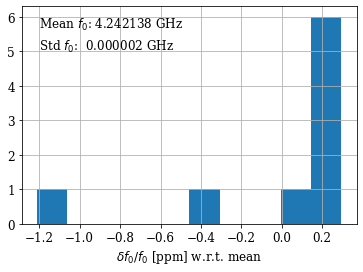

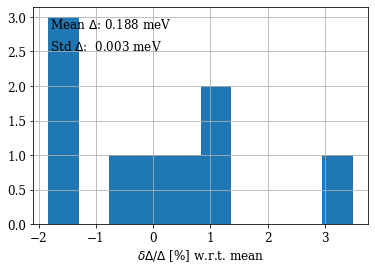

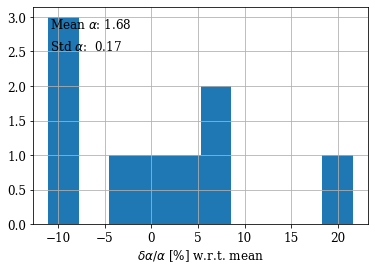

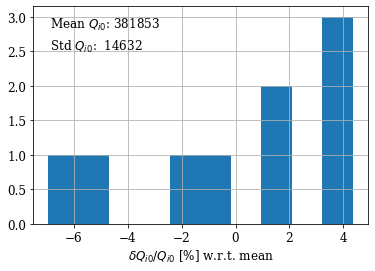

In [14]:
f0_T_mean = np.mean(f0_fit_by_T)
f0_T_std  = np.std(f0_fit_by_T)
f0_T_delt = ( f0_fit_by_T - f0_T_mean ) / f0_T_mean

D_T_mean = np.mean(D_fit_by_T)
D_T_std  = np.std(D_fit_by_T)
D_T_delt = ( D_fit_by_T - D_T_mean ) / D_T_mean

a_T_mean = np.mean(a_fit_by_T)
a_T_std  = np.std(a_fit_by_T)
a_T_delt = ( a_fit_by_T - a_T_mean ) / a_T_mean

Q_T_mean = np.mean(Qi0_fit_by_T)
Q_T_std  = np.std(Qi0_fit_by_T)
Q_T_delt = ( Qi0_fit_by_T - Q_T_mean ) / Q_T_mean

plt.figure()
plt.hist(f0_T_delt*1e6)
plt.xlabel(r"$\delta f_0 / f_0$ [ppm] w.r.t. mean")
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.1*(ylim[1]-ylim[0]), r"Mean $f_0$: %.6f GHz" % f0_T_mean)
plt.text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.2*(ylim[1]-ylim[0]), r"Std $f_0$:  %.6f GHz" % f0_T_std)

plt.figure()
plt.hist(D_T_delt*100)
plt.xlabel(r"$\delta \Delta / \Delta$ [%] w.r.t. mean")
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.1*(ylim[1]-ylim[0]), r"Mean $\Delta$: %.3f meV" % D_T_mean)
plt.text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.2*(ylim[1]-ylim[0]), r"Std $\Delta$:  %.3f meV" % D_T_std)

plt.figure()
plt.hist(a_T_delt*100)
plt.xlabel(r"$\delta \alpha / \alpha$ [%] w.r.t. mean")
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.1*(ylim[1]-ylim[0]), r"Mean $\alpha$: %.2f" % (a_T_mean*100.0))
plt.text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.2*(ylim[1]-ylim[0]), r"Std $\alpha$:  %.2f" % (a_T_std*100.0))

plt.figure()
plt.hist(Q_T_delt*100)
plt.xlabel(r"$\delta Q_{i0} / Q_{i0}$ [%] w.r.t. mean")
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.1*(ylim[1]-ylim[0]), r"Mean $Q_{i0}$: %.0f" % Q_T_mean)
plt.text(xlim[0]+0.05*(xlim[1]-xlim[0]), ylim[1]-0.2*(ylim[1]-ylim[0]), r"Std $Q_{i0}$:  %.0f" % Q_T_std)

## Read in Caltech/FNAL-ADR data

In [15]:
fname = "surface_Alres_deltaF.csv"
fpath = "/home/nexus-admin/Downloads"
try:
    data_ct = np.loadtxt(os.path.join(fpath,fname), delimiter=",", skiprows=2, max_rows=21, usecols=(0,1))
except OSError as e:
    data_ct = None
try:
    data_fl = np.loadtxt(os.path.join(fpath,fname), delimiter=",", skiprows=2,              usecols=(2,3))
except OSError as e:
    data_fl = None

## Money plot
Frequency shift vs temperature, one line per RF power.

Relative to fixed peak resonance: 4.242182 GHz


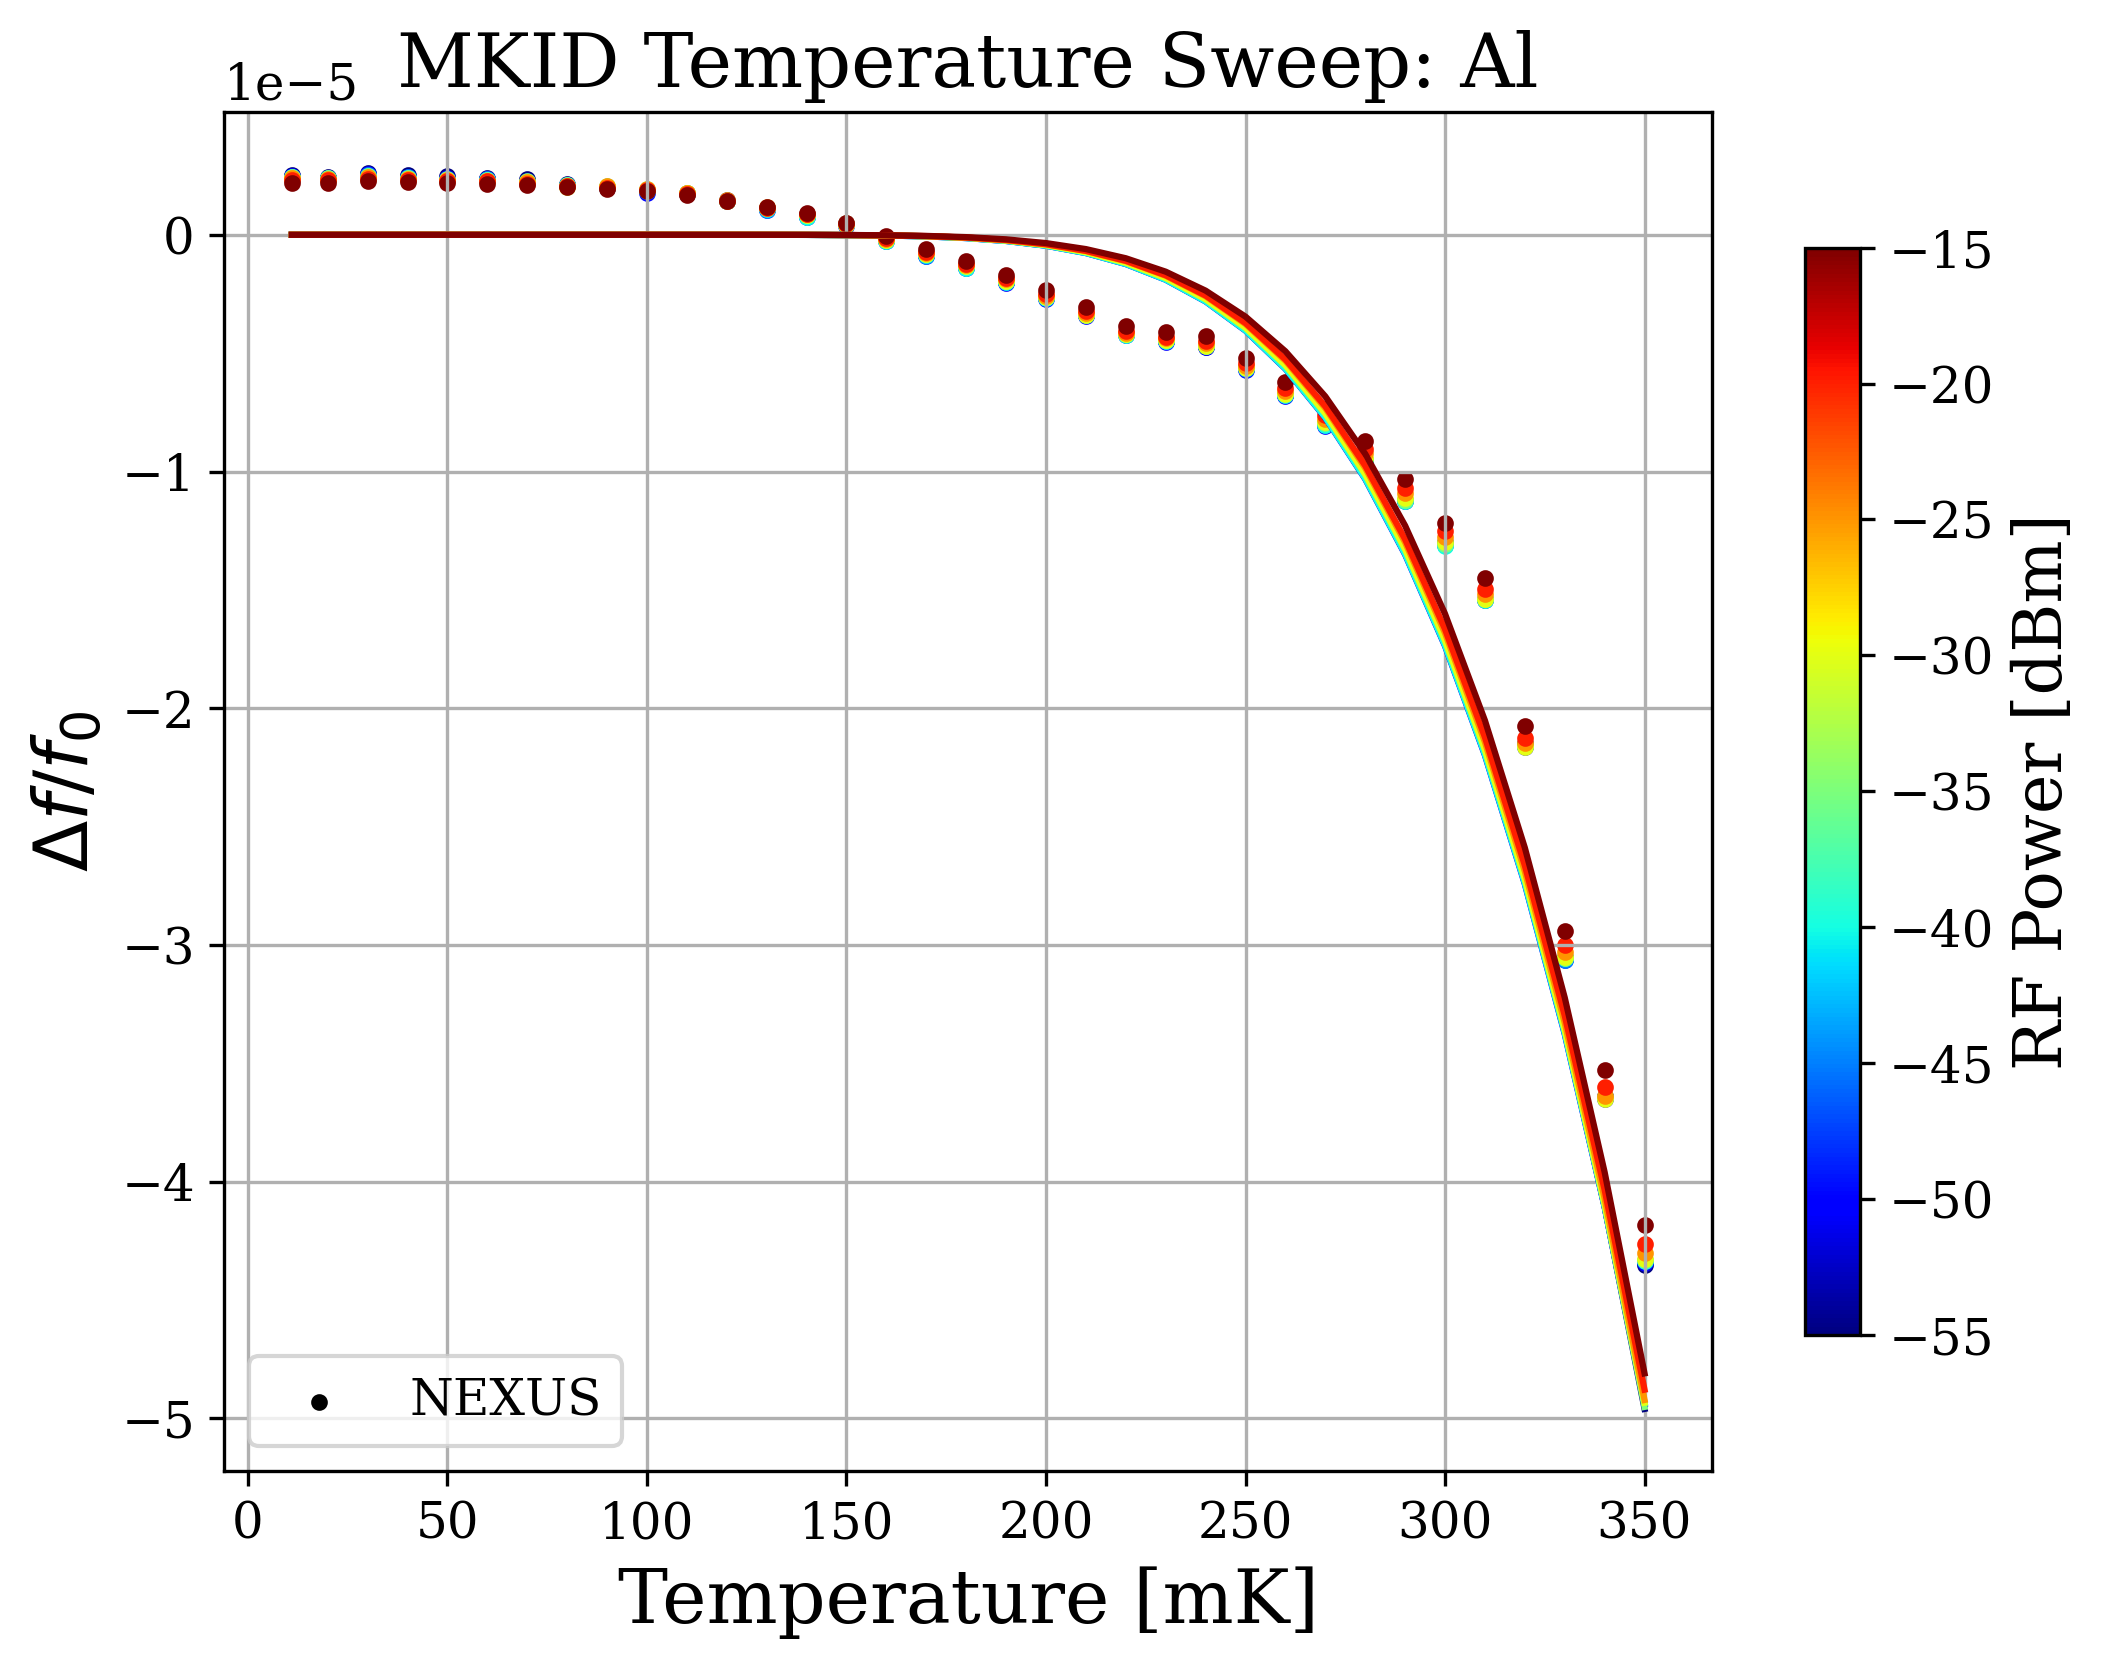

In [16]:
## Create a figure for the spectra
fig_main = plt.figure(200,figsize=(8,6),dpi=300)
ax_main  = fig_main.gca()
plt.title('MKID Temperature Sweep: '+resonator, fontdict = {'fontsize': 18})
plt.xlabel(r'Temperature [mK]', fontdict = {'fontsize': 18})
plt.ylabel(r'$\Delta f/f_0$', fontdict = {'fontsize': 18})

for i in np.arange(n_powers):
    f0 = f0_fit_by_T[i]
    Delta = D_fit_by_T[i]
    alpha = a_fit_by_T[i]
    
    ax_main.scatter( result_by_power_fr[i][:,0], (result_by_power_fr[i][:,1]-f0)/f0, color=colors_by_power[i], marker=".")#, label=str(power_range[i])+"dBm" )
    
    f_MB_pts = MBe.f_T(result_by_power_fr[i][:,0], f0, Delta, alpha)
    ax_main.plot(result_by_power_fr[i][:,0],(f_MB_pts-f0)/f0,color=colors_by_power[i])

if data_ct is not None:
    ax_main.scatter(data_ct[:,0],data_ct[:,1],marker="o",color=cm.jet(norm_P(float(-40))), label="Caltech - surface", edgecolor="k", alpha=0.3)
if data_fl is not None:
    ax_main.scatter(data_fl[:,0],data_fl[:,1],marker="v",color=cm.jet(norm_P(float(-40))), label="FNAL - surface", edgecolor="k", alpha=0.3)
    
xlims = ax_main.get_xlim()
ylims = ax_main.get_ylim()
ax_main.scatter([-100],[-100],marker=".",color="k",label="NEXUS")
ax_main.set_xlim(xlims)
ax_main.set_ylim(ylims)

cbar=plt.colorbar(cm.ScalarMappable(cmap=cm.jet, norm=norm_P),shrink=0.8)
cbar.set_label('RF Power [dBm]', size=16)
print("Relative to fixed peak resonance:",resf,"GHz")
plt.legend(loc='lower left')
plt.savefig(os.path.join(fpath,"AlRes_deltaF.png"),transparent=False)

## Look at the Q value

In [17]:
fname = "surface_Alres_Q.csv"
fpath = "/home/nexus-admin/Downloads"
try:
    dataQ_ct = np.loadtxt(os.path.join(fpath,fname), delimiter=",", skiprows=2, max_rows=21, usecols=(0,1))
except OSError as e:
    dataQ_ct = None
try:
    dataQ_fl = np.loadtxt(os.path.join(fpath,fname), delimiter=",", skiprows=2,              usecols=(2,3))
except OSError as e:
    dataQ_fl = None

<IPython.core.display.Javascript object>


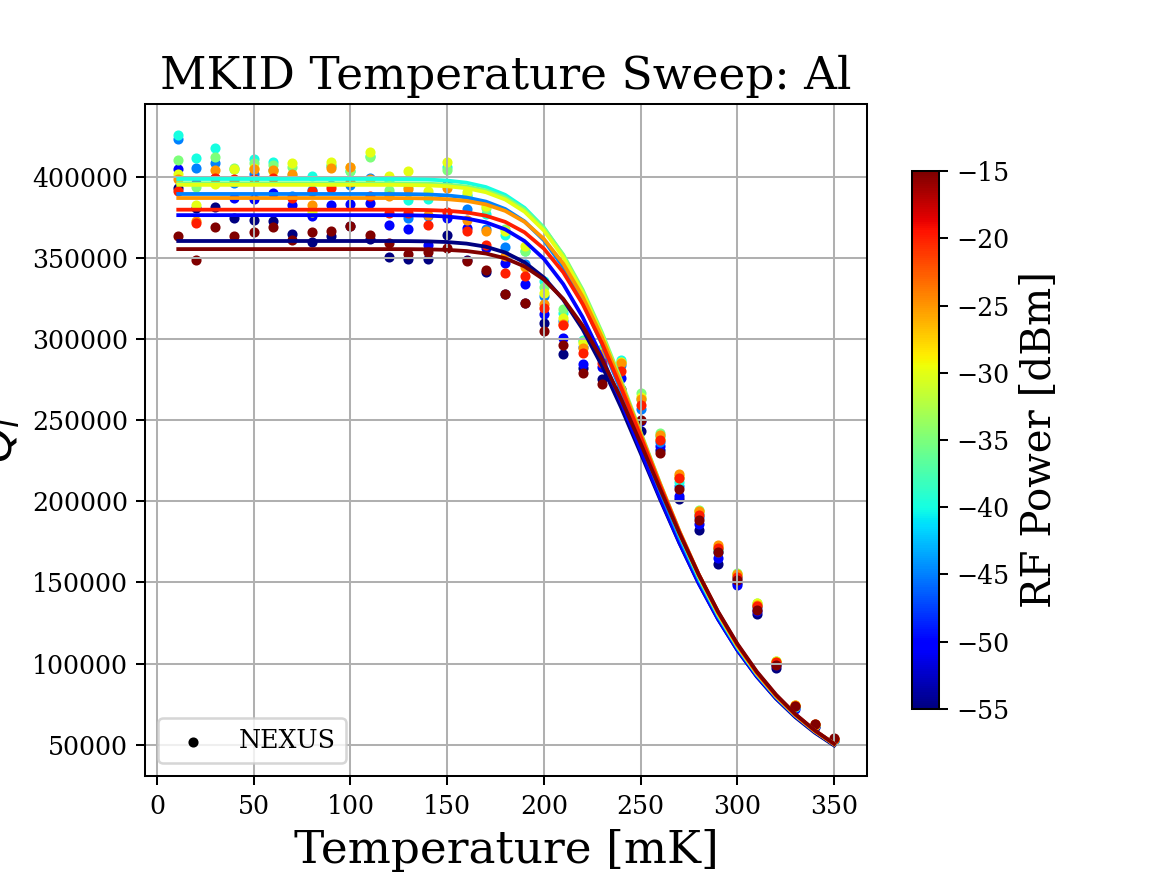

Relative to fixed peak resonance: 4.242182 GHz


In [42]:
# %matplotlib notebook
# fig_main = plt.figure(200)

## Create a figure for the spectra
fig_main = plt.figure(200,figsize=(8,6),dpi=300)
ax_main  = fig_main.gca()
plt.title('MKID Temperature Sweep: '+resonator, fontdict = {'fontsize': 18})
plt.xlabel(r'Temperature [mK]', fontdict = {'fontsize': 18})
plt.ylabel(r'$Q_i$', fontdict = {'fontsize': 18})

for i in np.arange(n_powers):
    f0 = f0_fit_by_T[i]
    Delta = D_fit_by_T[i]
    alpha = a_fit_by_T[i]
    Qi0   = Qi0_fit_by_T[i]
    
    ax_main.scatter( result_by_power_Qi[i][:,0], result_by_power_Qi[i][:,1], color=colors_by_power[i], marker=".")#, label=str(power_range[i])+"dBm" )
    
    Q_MB_pts = MBe.Qi_T(result_by_power_fr[i][:,0]/1e3, f0*1e9, Qi0, Delta/1e3, alpha)
    ax_main.plot(result_by_power_fr[i][:,0],Q_MB_pts,color=colors_by_power[i])

if dataQ_ct is not None:
    ax_main.scatter(dataQ_ct[:,0],dataQ_ct[:,1],marker="o",color=cm.jet(norm_P(float(-40))), label="Caltech - surface", edgecolor="k", alpha=0.3)
if dataQ_fl is not None:
    ax_main.scatter(dataQ_fl[:,0],dataQ_fl[:,1],marker="v",color=cm.jet(norm_P(float(-40))), label="FNAL - surface", edgecolor="k", alpha=0.3)
    
xlims = ax_main.get_xlim()
ylims = ax_main.get_ylim()
ax_main.scatter([-100],[-100],marker=".",color="k",label="NEXUS")
ax_main.set_xlim(xlims)
ax_main.set_ylim(ylims)
    
cbar=plt.colorbar(cm.ScalarMappable(cmap=cm.jet, norm=norm_P),shrink=0.8)
cbar.set_label('RF Power [dBm]', size=16)
print("Relative to fixed peak resonance:",resf,"GHz")
plt.legend(loc='lower left')
plt.savefig(os.path.join(fpath,"AlRes_Q.png"),transparent=False)

<IPython.core.display.Javascript object>


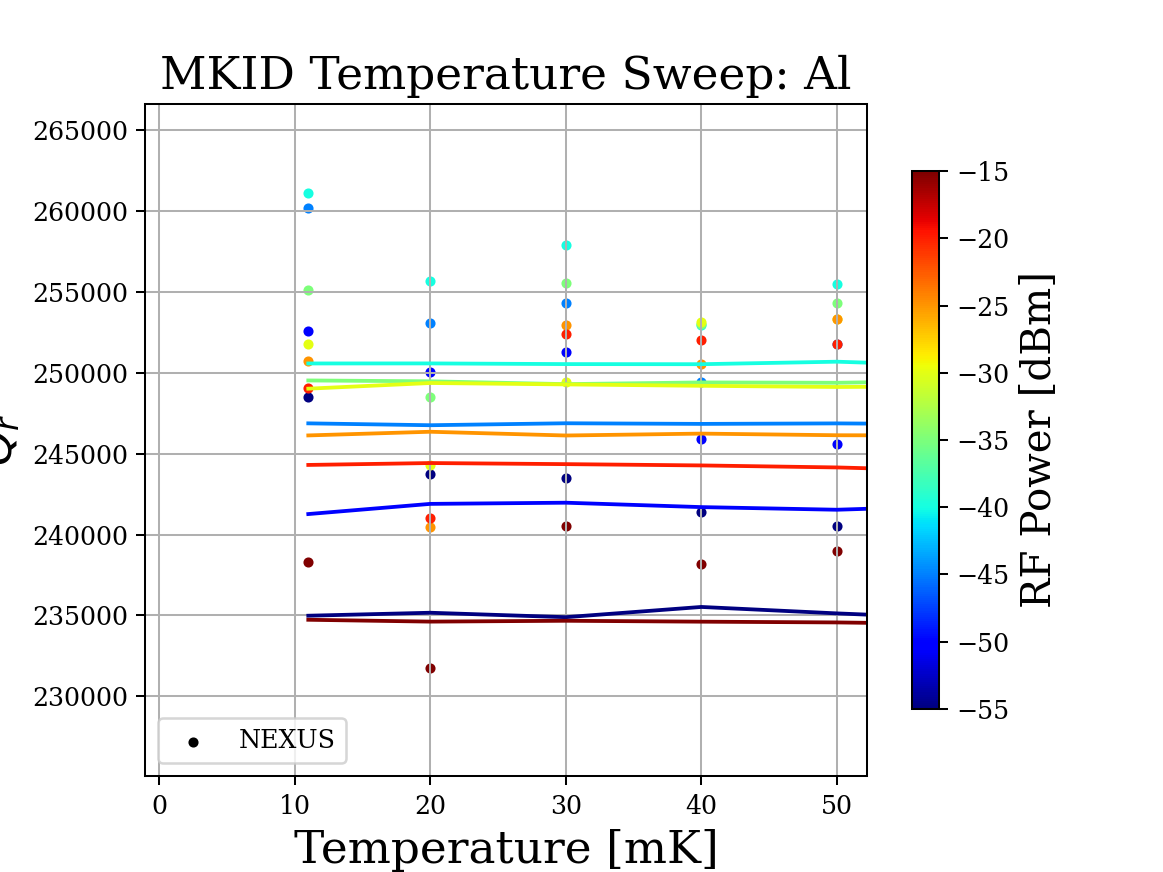

Relative to fixed peak resonance: 4.242182 GHz


In [43]:
# %matplotlib notebook
# fig_main = plt.figure(200)

## Create a figure for the spectra
fig_main = plt.figure(200,figsize=(8,6),dpi=300)
ax_main  = fig_main.gca()
plt.title('MKID Temperature Sweep: '+resonator, fontdict = {'fontsize': 18})
plt.xlabel(r'Temperature [mK]', fontdict = {'fontsize': 18})
plt.ylabel(r'$Q_r$', fontdict = {'fontsize': 18})

for i in np.arange(n_powers):
    f0 = f0_fit_by_T[i]
    Delta = D_fit_by_T[i]
    alpha = a_fit_by_T[i]
    Qi0   = Qi0_fit_by_T[i]
    
    ax_main.scatter( result_by_power_Qr[i][:,0], result_by_power_Qr[i][:,1], color=colors_by_power[i], marker=".")#, label=str(power_range[i])+"dBm" )
    
    Qi_MB_pts = MBe.Qi_T(result_by_power_fr[i][:,0]/1e3, f0*1e9, Qi0, Delta/1e3, alpha)
    Qr_MB_pts = result_by_power_Qc[i][:,1]/ (1 + (result_by_power_Qc[i][:,1]/Qi_MB_pts))
    ax_main.plot(result_by_power_fr[i][:,0],Qr_MB_pts,color=colors_by_power[i])

if dataQ_ct is not None:
    ax_main.scatter(dataQ_ct[:,0],dataQ_ct[:,1],marker="o",color=cm.jet(norm_P(float(-40))), label="Caltech - surface", edgecolor="k")
if dataQ_fl is not None:
    ax_main.scatter(dataQ_fl[:,0],dataQ_fl[:,1],marker="v",color=cm.jet(norm_P(float(-40))), label="FNAL - surface", edgecolor="k")
    
xlims = ax_main.get_xlim()
ylims = ax_main.get_ylim()
ax_main.scatter([-100],[-100],marker=".",color="k",label="NEXUS")
ax_main.set_xlim(xlims)
ax_main.set_ylim(ylims)
    
cbar=plt.colorbar(cm.ScalarMappable(cmap=cm.jet, norm=norm_P),shrink=0.8)
cbar.set_label('RF Power [dBm]', size=16)
print("Relative to fixed peak resonance:",resf,"GHz")
plt.legend(loc='lower left')
plt.savefig(os.path.join(fpath,"AlRes_Q.png"),transparent=False)

## Use MB Fits to predict resonance shapes and locations

Power =  -40  dBM files:
Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

Resonance #0
Resonance #0


/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/share/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

(4.241832, 4.242331999999999)

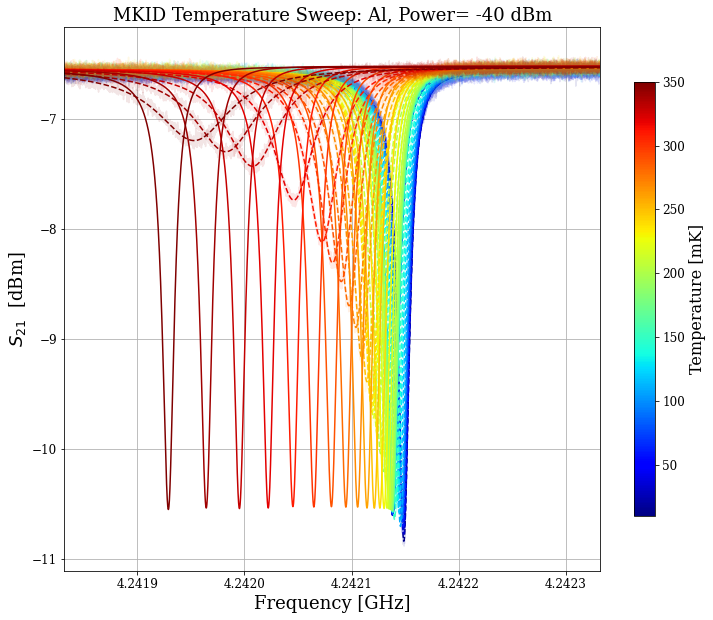

In [21]:
## Create a figure for the spectra at a given power
fig_res = plt.figure(300,figsize=(12,10))
ax_res  = fig_res.gca()
ax_res.set_title('MKID Temperature Sweep: '+resonator+", Power= "+str(power_to_plot)+" dBm", fontdict = {'fontsize': 18})
ax_res.set_xlabel(r'Frequency [GHz]', fontdict = {'fontsize': 18})
ax_res.set_ylabel(r'$S_{21}$  [dBm]', fontdict = {'fontsize': 18})

cbar=plt.colorbar(cm.ScalarMappable(cmap=cm.jet, norm=norm_T),shrink=0.8)
cbar.set_label('Temperature [mK]', size=16)
# plt.legend(loc='best')#,bbox_to_anchor=(1.,0.5))

## Start the loop over each power
for i in np.arange(n_powers):
    pwr = power_range[i]

    ## Only do the files for the power of interest
    if not (pwr==power_to_plot):
        continue
    
    ## Get the list of files at this power
    print("Power = ",pwr," dBM files:")
#     p_files = get_input_files_all(day, pwr, verbose=True)[idx::2]
    p_files = get_input_files_range(day_min, time_min, day_max, time_max, pwr, verbose=False)[idx::2]
    
    ## Get the right index for this power
    pwr_idx  = np.argmin(np.abs(power_range-pwr))
    
    ## Extract the temperature setpoints from the file naming scheme
    temp_range = np.array([ float(f.split("/")[-1].split("_")[1][1:]) for f in p_files ])
    n_temps    = len(temp_range)
    
    ## Extract the MB fit results for this power
    f0  = f0_fit_by_T[pwr_idx]
    D   = D_fit_by_T[pwr_idx]
    a   = a_fit_by_T[pwr_idx]
    Qi0 = Qi0_fit_by_T[pwr_idx]
    
    ## Now loop over each temperature
    for j in np.arange(n_temps):
        
        ## Load the VNA data for this power, temperature pair
        sweep = VNAMeas.decode_hdf5(p_files[j])
        
        ## Parse the file, get a complex S21 and frequency in GHz
        f = sweep.frequencies / 1.0e9
        z = sweep.S21realvals + 1j*sweep.S21imagvals
        
        ## Create an object to store fit results
        this_f_r = fitclass.SingleFileResult(p_files[j])
        this_f_r.power = pwr
        this_f_r.start_T = temp_range[j] * np.ones(2)
        this_f_r.final_T = temp_range[j] * np.ones(2)
        
        ## Fit this data file
        fr, Qr, Qc, Qi, fig = fitres.sweep_fit(f,z,this_f_r,start_f=f[0],stop_f=f[-1])
        
        if (len(fr) > 1):
            fr = fr[0]
            Qr = Qr[0]
            Qc = Qc[0]
            Qi = Qi[0]
        
        ## Extract fit results
        Qchatmag = this_f_r.peak_fits[0].fine_result["QcHat"]
        a_real   = this_f_r.peak_fits[0].fine_result["zOff"].real
        a_img    = this_f_r.peak_fits[0].fine_result["zOff"].imag
        phi      = this_f_r.peak_fits[0].fine_result["phi"]
        tau      = this_f_r.peak_fits[0].fine_result["tau"].real
        imtau    = this_f_r.peak_fits[0].fine_result["tau"].imag    

        ## Calculate the resonance fits
        fit_z_uncorr = fitres.resfunc3(f, fr, Qr, Qchatmag, a_real+1j*a_img, phi, tau+1j*imtau)
        fit_z_corr   = 1-(Qr/Qc)/(1+2j*Qr*(f-fr)/fr)
        
        ## Use MB fit results to estimate the resonance shape
        f_T  = MBe.f_T( temp_range[j], f0,      D, a)
        Qi_T = MBe.Qi_T(temp_range[j], f0, Qi0, D, a)
        Qr_T = Qc/ (1 + (Qc/Qi_T))
        
        MB_z_uncorr = fitres.resfunc3(f, f_T, Qr_T, Qc, a_real+1j*a_img, phi, tau+1j*imtau)
        MB_z_corr   = 1-(Qr_T/Qc)/(1+2j*Qr_T*(f-f_T)/f_T)

        if (pwr==power_to_plot):
            ax_res.plot(f, 20.*np.log10(np.sqrt(z*z)),label=str(temp_range[j]),alpha=0.1,color=cm.jet(norm_T(temp_range[j])))
            ax_res.plot(f, 20*np.log10(fit_z_uncorr), color=cm.jet(norm_T(temp_range[j])), linestyle="--")
            ax_res.plot(f, 20*np.log10(MB_z_uncorr) , color=cm.jet(norm_T(temp_range[j])), linestyle="-")

ax_res.set_xlim([resf-0.00035,resf+0.00015])

# Test MB Fitting to Qr

In [22]:
f0_fit_by_T2  = np.zeros(len(power_range))
D_fit_by_T2   = np.zeros(len(power_range))
a_fit_by_T2   = np.zeros(len(power_range))
Qr0_fit_by_T2 = np.zeros(len(power_range))

for pwr in power_range:

    ## Get the right index for this power
    pwr_idx  = np.argmin(np.abs(power_range-pwr))
    print(pwr, pwr_idx)
    
    ## Pass the correct columns into the fitter
    results = MBe.MB_fitter(result_by_power_fr[pwr_idx][:,0]/1e3,   ## temperatures in K
                            result_by_power_Qr[pwr_idx][:,1],       ## resonator fitted Qrs
                            result_by_power_fr[pwr_idx][:,1]*1e9)   ## resonator fitted Fs in Hz

    f0_fit_by_T2[pwr_idx]  = results[0]
    D_fit_by_T2[pwr_idx]   = results[1]
    a_fit_by_T2[pwr_idx]   = results[2]
    Qr0_fit_by_T2[pwr_idx] = results[3]

-55 0
-50 1
-45 2
-40 3
-35 4
-30 5
-25 6
-20 7
-15 8


In [23]:
dict_T2 = {"power":power_range,
          "f0":f0_fit_by_T2,
          "delta":D_fit_by_T2,
          "alpha":a_fit_by_T2,
          "Qr0":Qr0_fit_by_T2}

fit_df2 = pd.DataFrame(dict_T2)
fit_df2

,power,f0,delta,alpha,Qr0
0,-55,4.242138,0.199346,0.024737,234647.745062
1,-50,4.242138,0.195970,0.022002,241003.741875
2,-45,4.242138,0.196869,0.022668,246198.116074
3,-40,4.242138,0.196775,0.022602,249755.661677
4,-35,4.242138,0.199555,0.024864,248814.077280
5,-30,4.242138,0.198537,0.023961,248426.888580
6,-25,4.242137,0.202479,0.027367,245177.218723
7,-20,4.242135,0.201368,0.026119,242829.106335
8,-15,4.242132,0.203907,0.028012,233283.617508


Relative to fixed peak resonance: 4.242182 GHz


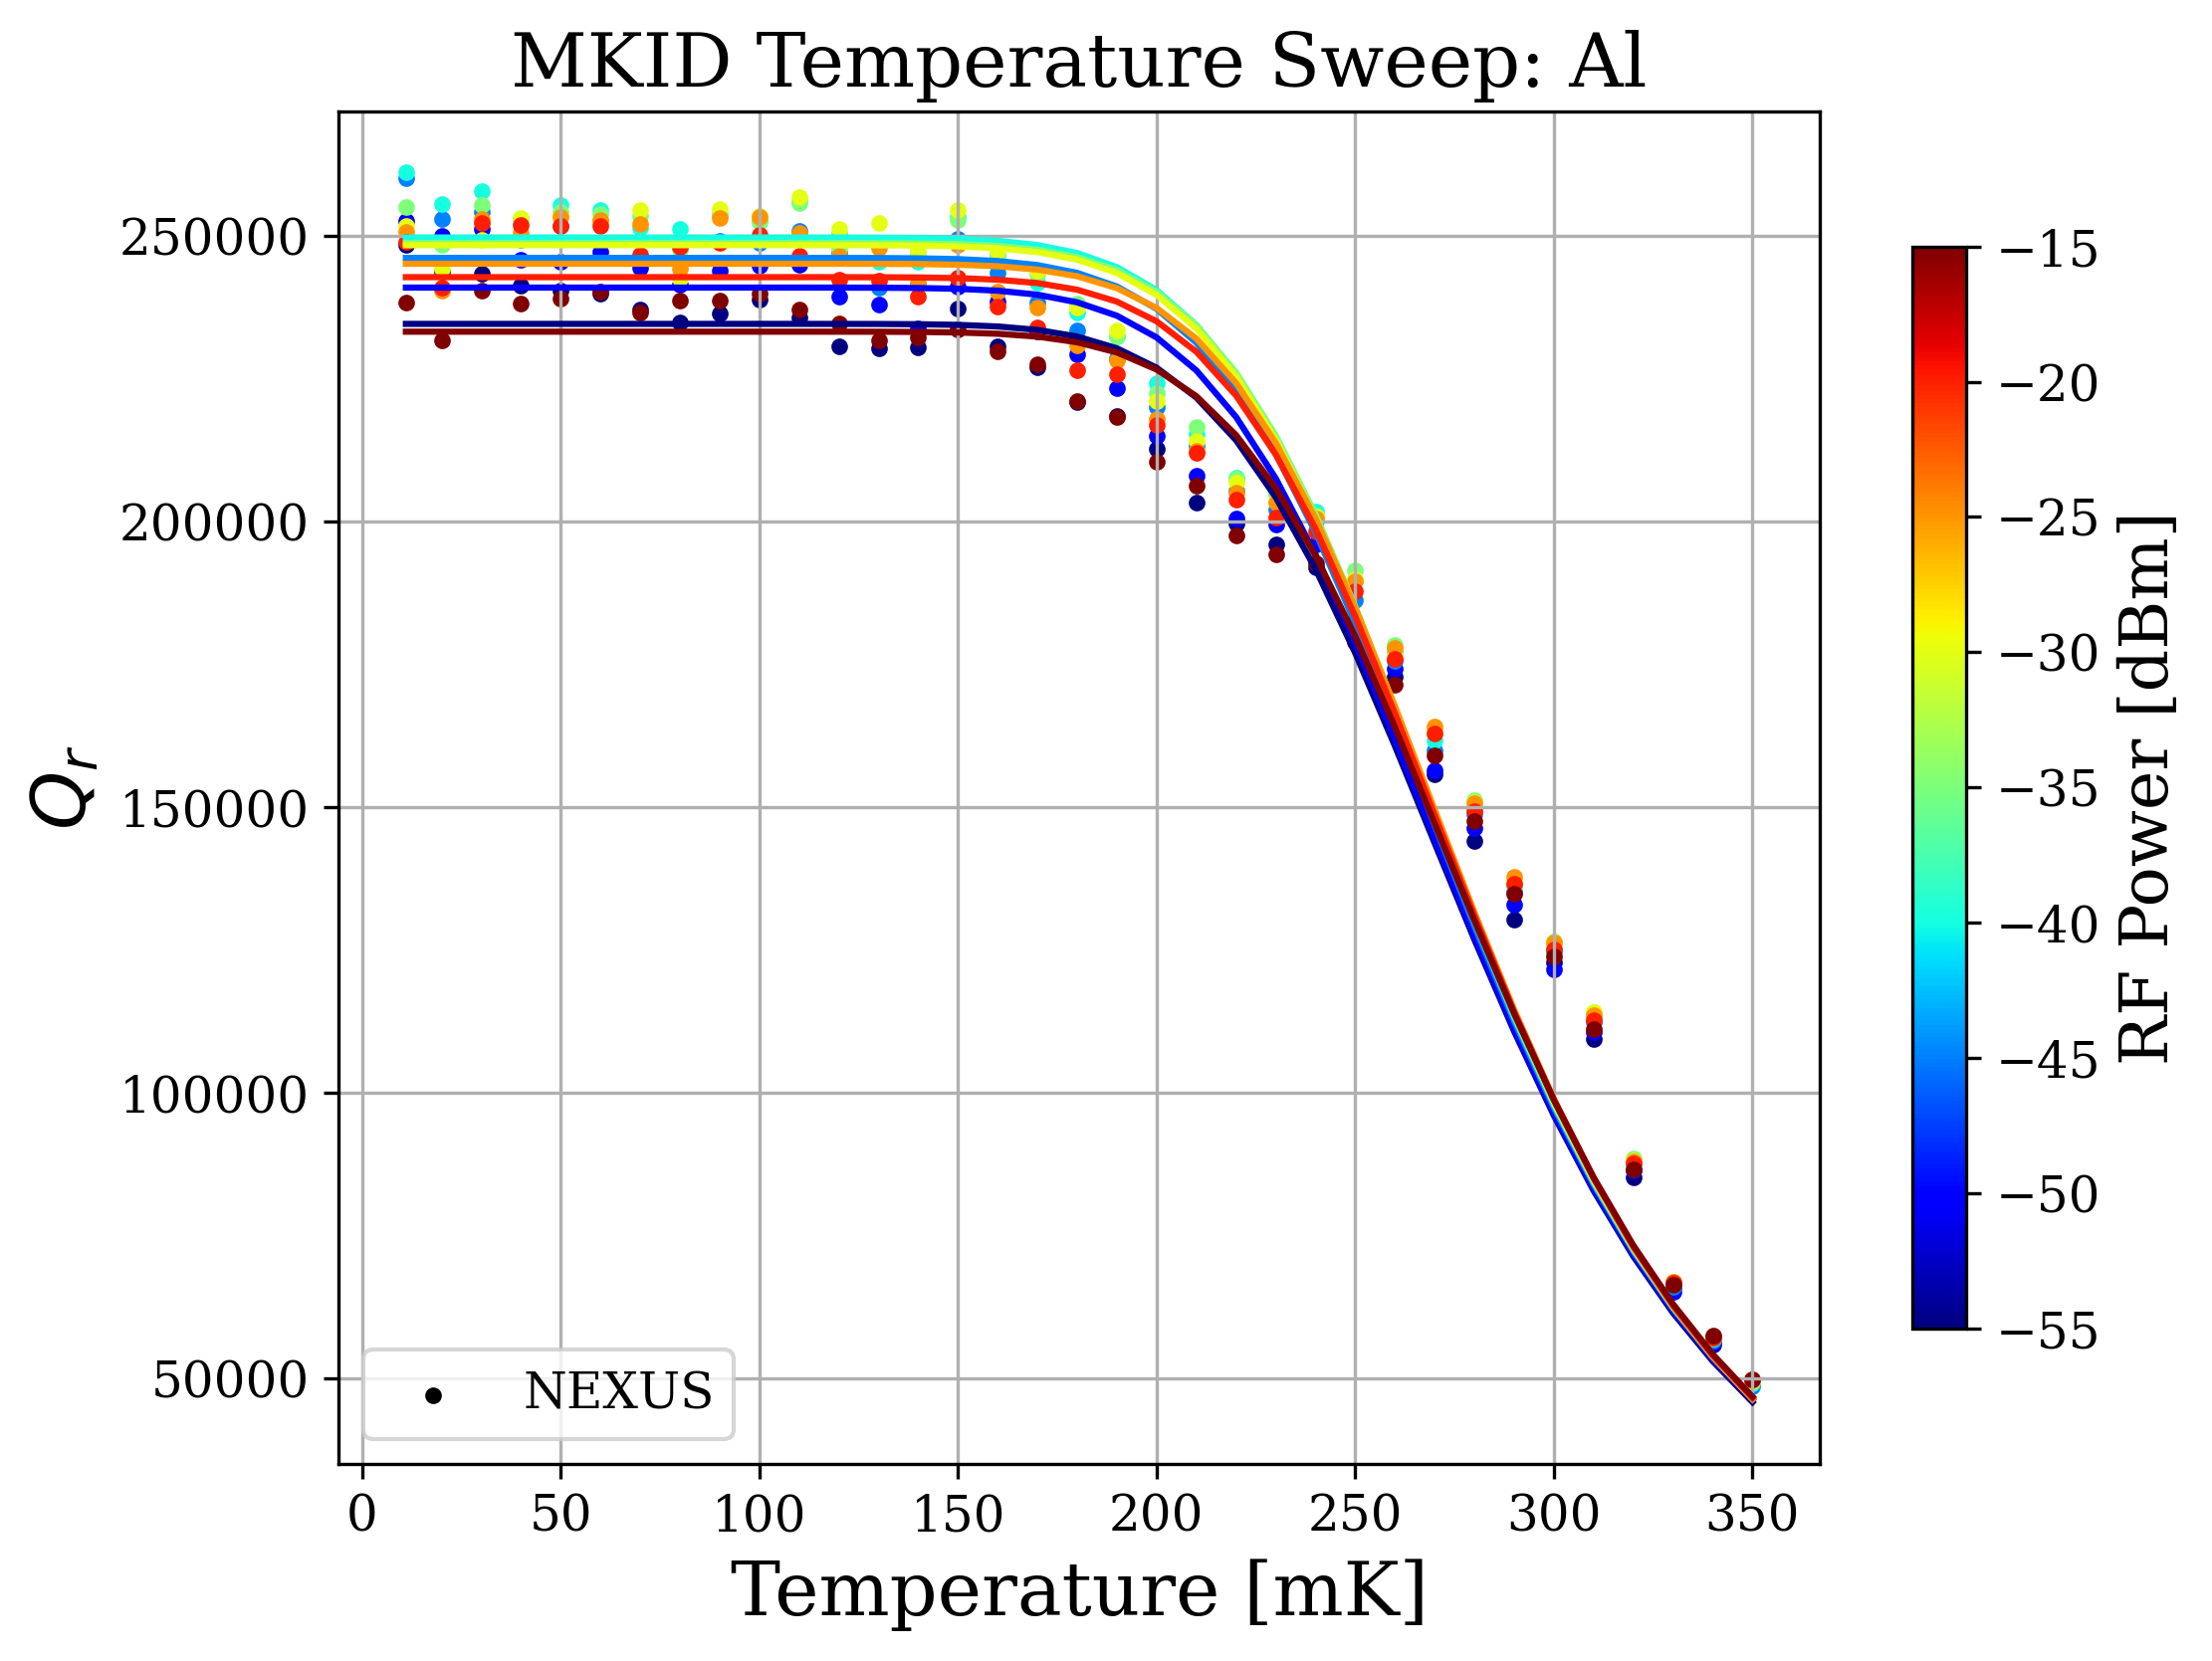

In [24]:
## Create a figure for the spectra
fig_main = plt.figure(200,figsize=(8,6),dpi=300)
ax_main  = fig_main.gca()
plt.title('MKID Temperature Sweep: '+resonator, fontdict = {'fontsize': 18})
plt.xlabel(r'Temperature [mK]', fontdict = {'fontsize': 18})
plt.ylabel(r'$Q_r$', fontdict = {'fontsize': 18})

for i in np.arange(n_powers):
    f0 = f0_fit_by_T2[i]
    Delta = D_fit_by_T2[i]
    alpha = a_fit_by_T2[i]
    Qr0   = Qr0_fit_by_T2[i]
    
    ax_main.scatter( result_by_power_Qr[i][:,0], result_by_power_Qr[i][:,1], color=colors_by_power[i], marker=".")#, label=str(power_range[i])+"dBm" )
    
    Q_MB_pts = MBe.Qi_T(result_by_power_fr[i][:,0]/1e3, f0*1e9, Qr0, Delta/1e3, alpha)
    ax_main.plot(result_by_power_fr[i][:,0],Q_MB_pts,color=colors_by_power[i])

if dataQ_ct is not None:
    ax_main.scatter(dataQ_ct[:,0],dataQ_ct[:,1],marker="o",color=cm.jet(norm_P(float(-40))), label=r"Caltech $Q_i$ - surface", edgecolor="k", alpha=0.3)
if dataQ_fl is not None:
    ax_main.scatter(dataQ_fl[:,0],dataQ_fl[:,1],marker="v",color=cm.jet(norm_P(float(-40))), label=r"FNAL $Q_i$ - surface", edgecolor="k", alpha=0.3)
    
xlims = ax_main.get_xlim()
ylims = ax_main.get_ylim()
ax_main.scatter([-100],[-100],marker=".",color="k",label="NEXUS")
ax_main.set_xlim(xlims)
ax_main.set_ylim(ylims)
    
cbar=plt.colorbar(cm.ScalarMappable(cmap=cm.jet, norm=norm_P),shrink=0.8)
cbar.set_label('RF Power [dBm]', size=16)
print("Relative to fixed peak resonance:",resf,"GHz")
plt.legend(loc='lower left')
plt.savefig(os.path.join(fpath,"AlRes_Q.png"),transparent=False)